In [140]:
import pandas as pd
import numpy as np

In [141]:
base = pd.read_excel('obesidade.xlsx')

In [142]:
base.head()

,ID,Idade,GeneroCod,Eobeso,fumo_atual,imc,obesoHer,cc,cq,rcq,frqCardiaca,fumo,atvFisica,stress,psisto,pdiasto,psisalta
0,1,20.0,2.0,Não,0,27.94,0,95.0,112,0.85,75,0.0,2.0,3.0,120.00,80.00,0.0
1,2,31.0,1.0,Não,0,28.76,0,88.0,101,0.87,66,0.0,2.0,0.0,128.00,74.33,1.0
2,3,19.0,2.0,Não,0,25.35,0,79.0,102,0.77,69,0.0,2.0,0.0,113.33,70.00,0.0
3,4,20.0,2.0,Não,0,20.73,0,91.0,80,1.14,85,0.0,0.0,0.0,130.00,76.67,1.0
4,5,19.0,2.0,Não,0,24.54,0,83.0,98,0.85,72,0.0,2.0,0.0,130.00,80.00,1.0


In [143]:
base.isnull().sum()

ID             0
Idade          1
GeneroCod      1
Eobeso         1
fumo_atual     0
imc            1
obesoHer       0
cc             1
cq             0
rcq            1
frqCardiaca    0
fumo           1
atvFisica      1
stress         1
psisto         1
pdiasto        1
psisalta       1
dtype: int64

In [144]:
base.loc[base.cc.isnull()]

,ID,Idade,GeneroCod,Eobeso,fumo_atual,imc,obesoHer,cc,cq,rcq,frqCardiaca,fumo,atvFisica,stress,psisto,pdiasto,psisalta
400,401,NaN,NaN,NaN,0,NaN,0,NaN,103,NaN,97,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
from sklearn.impute import SimpleImputer

In [146]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [147]:
faltantes = base[['Idade', 'GeneroCod', 'imc', 'cc', 'rcq', 'fumo', 'atvFisica', 'stress', 'psisto', 'pdiasto', 'psisalta']]

In [148]:
imputer = imputer.fit_transform(faltantes)

In [149]:
base[['Idade', 'GeneroCod', 'imc', 'cc', 'rcq', 'fumo', 'atvFisica', 'stress', 'psisto', 'pdiasto', 'psisalta']] = imputer

In [150]:
base.isnull().sum()

ID             0
Idade          0
GeneroCod      0
Eobeso         1
fumo_atual     0
imc            0
obesoHer       0
cc             0
cq             0
rcq            0
frqCardiaca    0
fumo           0
atvFisica      0
stress         0
psisto         0
pdiasto        0
psisalta       0
dtype: int64

In [151]:
from sklearn.preprocessing import LabelEncoder

In [152]:
labelencoder_base = LabelEncoder()

In [153]:
y = base.iloc[:, 3].values

In [154]:
base.Eobeso = base.Eobeso.fillna(method='ffill')

In [155]:
base.isnull().sum()

ID             0
Idade          0
GeneroCod      0
Eobeso         0
fumo_atual     0
imc            0
obesoHer       0
cc             0
cq             0
rcq            0
frqCardiaca    0
fumo           0
atvFisica      0
stress         0
psisto         0
pdiasto        0
psisalta       0
dtype: int64

In [173]:
y = labelencoder_base.fit_transform(base.Eobeso.values)

In [174]:
x = base.iloc[:, 4:]

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

In [177]:
x_train

,fumo_atual,imc,obesoHer,cc,cq,rcq,frqCardiaca,fumo,atvFisica,stress,psisto,pdiasto,psisalta
224,0,20.85,0,75.0,88,0.85,67,0.0,2.0,2.0,135.67,87.33,1.0
138,0,20.76,0,76.0,101,0.75,76,0.0,1.0,2.0,100.00,76.67,0.0
239,0,23.44,0,78.0,101,0.77,70,0.0,2.0,0.0,123.67,85.67,1.0
293,0,27.82,0,98.0,112,0.88,80,0.0,0.0,1.0,140.00,83.33,1.0
275,0,23.63,0,84.0,101,0.83,61,0.0,1.0,0.0,113.33,65.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0,22.43,0,76.0,97,0.78,100,0.0,2.0,2.0,100.67,68.33,0.0
192,0,22.68,0,76.0,98,0.78,73,0.0,2.0,2.0,115.00,61.67,0.0
117,0,27.13,0,97.0,112,0.87,67,0.0,2.0,0.0,129.67,77.67,1.0
47,0,18.90,0,66.0,89,0.74,89,0.0,1.0,3.0,96.00,67.00,0.0


In [178]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [204]:
y_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [179]:
from sklearn.naive_bayes import GaussianNB

In [182]:
classificador = GaussianNB()

In [183]:
classificador.fit(x_train, y_train)

GaussianNB()

In [184]:
previsoes = classificador.predict(x_test)

In [185]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [186]:
precisao = accuracy_score(y_test, previsoes)

In [188]:
print('Precisão do algoritmo: {:.1f}%'.format(precisao*100))

Precisão do algoritmo: 80.6%


In [196]:
import matplotlib.pyplot as plt

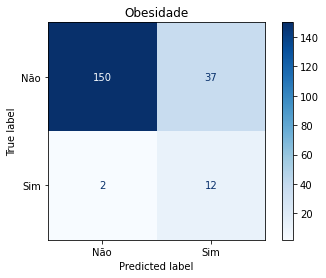

In [203]:
matriz = plot_confusion_matrix(classificador, x_test, y_test, display_labels=['Não', 'Sim'], 
cmap=plt.cm.Blues)
plt.title('Obesidade');